# Group Project

## Starbucks Survey Analysis

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# importing data
df = pd.read_csv("Starbucks_satisfactory_survey.csv")

In [3]:
# defining new column names
df.columns = ['time', 'gender', 'age', 'employment', 'income', 'visits', 'Here/take', 'duration',
              'distance', 'card', 'product_type', 'money', 'ranking_quality',
              'ranking_price', 'ranking_discount', 'ranking_ambiance', 'ranking_wifi', 'ranking_service',
              "ranking_meetings", 'promotion_source', 'buy']

In [4]:
df.head()

,time,gender,age,employment,income,visits,Here/take,duration,distance,card,...,money,ranking_quality,ranking_price,ranking_discount,ranking_ambiance,ranking_wifi,ranking_service,ranking_meetings,promotion_source,buy
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time              122 non-null    object
 1   gender            122 non-null    object
 2   age               122 non-null    object
 3   employment        122 non-null    object
 4   income            122 non-null    object
 5   visits            122 non-null    object
 6   Here/take         121 non-null    object
 7   duration          122 non-null    object
 8   distance          122 non-null    object
 9   card              122 non-null    object
 10  product_type      122 non-null    object
 11  money             122 non-null    object
 12  ranking_quality   122 non-null    int64 
 13  ranking_price     122 non-null    int64 
 14  ranking_discount  122 non-null    int64 
 15  ranking_ambiance  122 non-null    int64 
 16  ranking_wifi      122 non-null    int64 
 17  ranking_service 

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
117    False
118    False
119    False
120    False
121    False
Length: 122, dtype: bool

In [7]:
df[df.select_dtypes(['object']).columns] =\
    df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
df.drop(columns='time', inplace=True)

In [9]:
df.isnull().sum()

gender              0
age                 0
employment          0
income              0
visits              0
Here/take           1
duration            0
distance            0
card                0
product_type        0
money               0
ranking_quality     0
ranking_price       0
ranking_discount    0
ranking_ambiance    0
ranking_wifi        0
ranking_service     0
ranking_meetings    0
promotion_source    1
buy                 0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [65]:
# Age column.
old_values = df.age.unique()
new_values = ["20-29", "30-39", ">40", "<20"]
for i in range(len(new_values)):
    df.age = df.age.replace([old_values[i]], new_values[i])

# Income column.
old_values = df.income.unique()
new_values = ["<25,000", "50,000-100,000", "25,000-50,000", "100,000-150,000", ">150,000"]
for i in range(len(new_values)):
    df.income = df.income.replace([old_values[i]], new_values[i])
# Duration column.
old_values = df.duration.unique()
new_values = ["30m-1h", "<30m", ">3h", "1-2h", "2-3h"]
for i in range(len(new_values)):
    df.duration = df.duration.replace([old_values[i]], new_values[i])
# Distance column.
old_values = df.distance.unique()
new_values = ["<1km", "1-3km", ">3km"]
for i in range(len(new_values)):
    df.distance = df.distance.replace([old_values[i]], new_values[i])
# Money column.
old_values = df.money.unique()
new_values = ["<20", "20-40", "<40", "0"]
for i in range(len(new_values)):
    df.money = df.money.replace([old_values[i]], new_values[i])

## Exploratory Data Analysis

In [66]:
df.head()

,gender,age,employment,income,visits,Here/take,duration,distance,card,product_type,money,ranking_quality,ranking_price,ranking_discount,ranking_ambiance,ranking_wifi,ranking_service,ranking_meetings,promotion_source,buy
0,Female,20-29,Student,"<25,000",Rarely,Dine in,30m-1h,<1km,Yes,Coffee,<20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,20-29,Student,"<25,000",Rarely,Take away,<30m,1-3km,Yes,Cold drinks;Pastries,<20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,20-29,Employed,"<25,000",Monthly,Dine in,30m-1h,>3km,Yes,Coffee,<20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,20-29,Student,"<25,000",Rarely,Take away,<30m,>3km,No,Coffee,<20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,20-29,Student,"<25,000",Monthly,Take away,30m-1h,1-3km,No,Coffee;Sandwiches,20-40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [67]:
df.groupby(["gender", "employment"])['visits'].value_counts()

gender  employment     visits 
Female  Employed       Rarely     21
                       Monthly     7
                       Weekly      3
                       Never       2
        Housewife      Monthly     1
                       Rarely      1
        Self-employed  Rarely      4
                       Monthly     1
                       Never       1
        Student        Rarely     19
                       Never       3
                       Monthly     1
                       Weekly      1
Male    Employed       Rarely     15
                       Monthly     9
                       Weekly      3
        Self-employed  Rarely      5
                       Monthly     3
                       Weekly      2
                       Daily       1
        Student        Rarely     11
                       Monthly     4
                       Never       2
                       Daily       1
Name: visits, dtype: int64

In [68]:
df.groupby('gender')['money'].value_counts()

gender  money
Female  <20      34
        20-40    22
        0         7
        <40       2
Male    <20      24
        20-40    23
        <40       5
        0         4
Name: money, dtype: int64

## Data Visualization

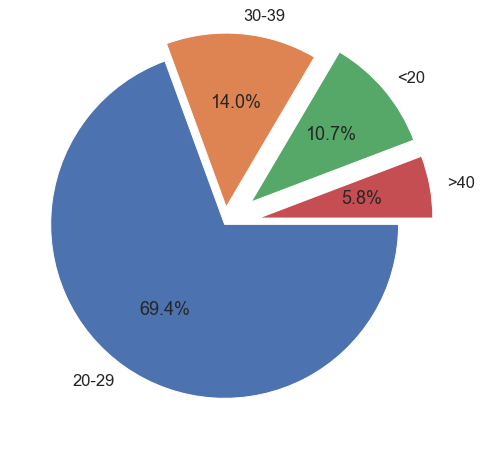

In [69]:
explode = (0, 0.1, 0.2, 0.2)
pie, ax = plt.subplots(figsize=[10, 8])
counts = df['age'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes, labels=counts.index, explode=explode,
        counterclock=False, autopct='%1.1f%%')
plt.show()

As we can see the age of the respondents is not uniformly distributed.

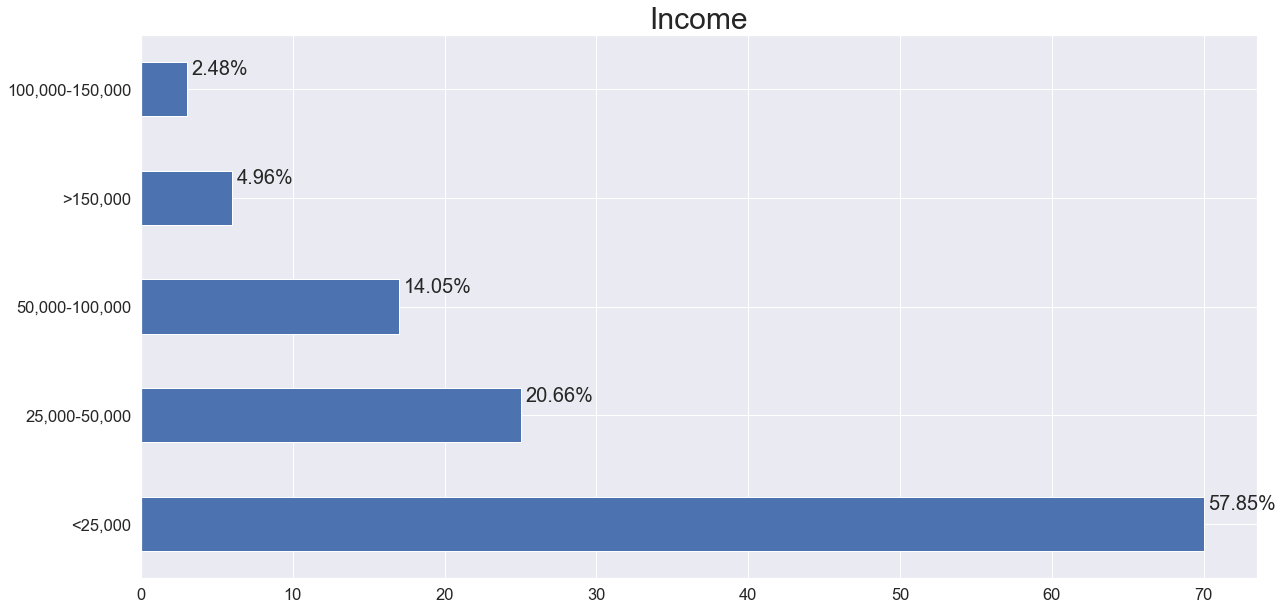

In [70]:
plt.figure(figsize=(20, 10))
plt.title("Income", size=30)
ax = df["income"].value_counts().plot.barh()
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38,
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=20)

In [71]:
direction = df.columns[11:18].values

In [72]:
mean_yes = np.mean(df[df['buy'] == "Yes"][direction]).values
mean_no = np.mean(df[df['buy'] == "No"][direction]).values

In [73]:
new_df = pd.DataFrame({"Ranking": direction, "Yes": mean_yes, "No": mean_no})

In [74]:
new_df = pd.melt(new_df, id_vars=["Ranking"],
                 var_name="buy", value_name="values")

In [75]:
fig = px.line_polar(new_df, r="values", theta="Ranking",
                    color="buy", line_close=True, range_r=[0, 5])
fig.show()

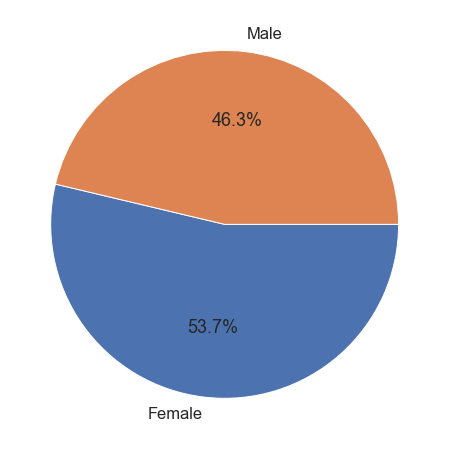

In [76]:
pie, ax = plt.subplots(figsize=[10, 8])
counts = df['gender'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes, labels=counts.index, counterclock=False, autopct='%1.1f%%')
plt.show()

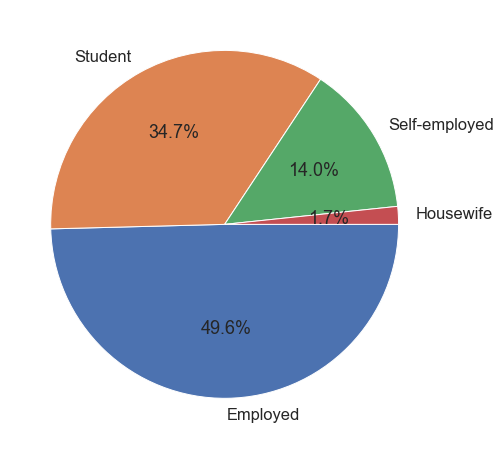

In [77]:
pie, ax = plt.subplots(figsize=[10, 8])
counts = df['employment'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes, labels=counts.index, counterclock=False, autopct='%1.1f%%')
plt.show()

C:\Users\Minasyan\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



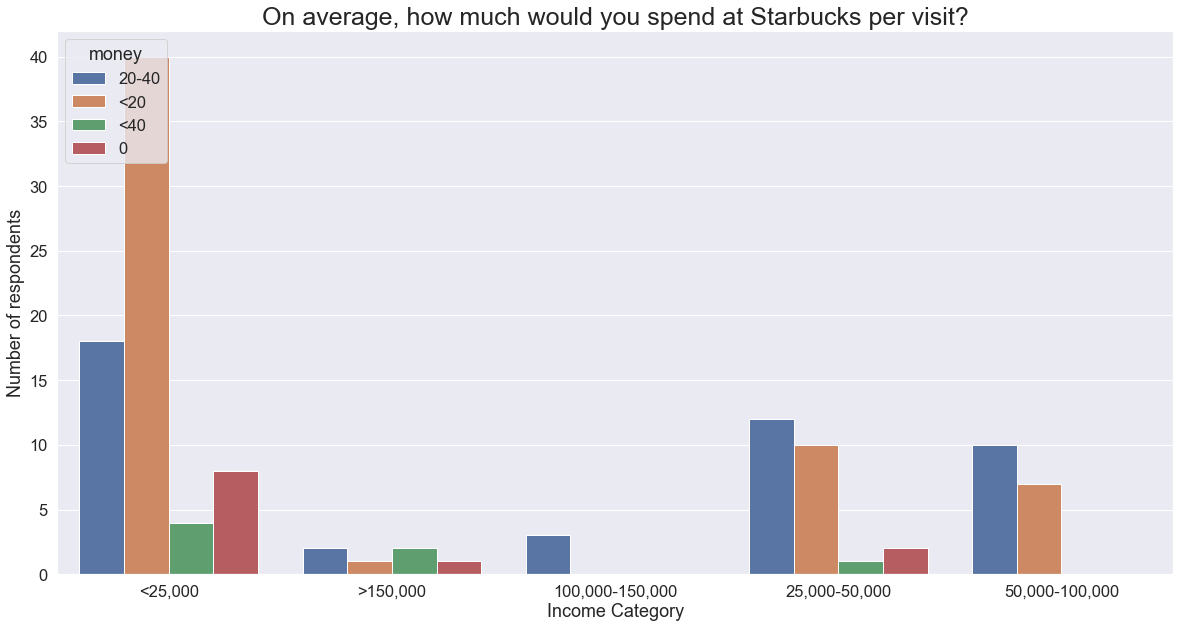

In [78]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.countplot(df["income"], hue=df["money"])
plt.ylabel('Number of respondents')
plt.xlabel('Income Category')
plt.title("On average, how much would you spend at Starbucks per visit?", size=25);

<Figure size 1800x1800 with 0 Axes>

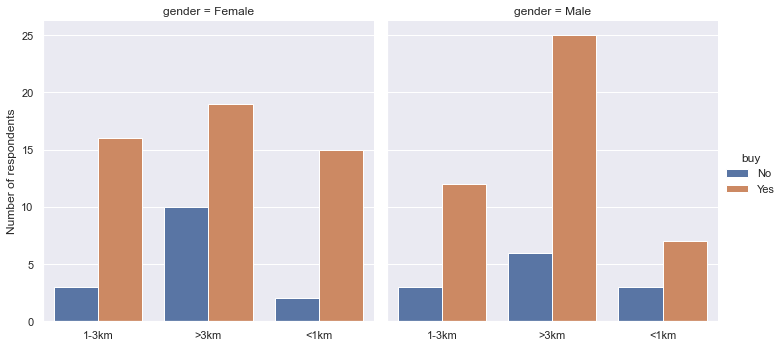

In [79]:
sns.set(font_scale=1)
plt.figure(figsize=(25, 25))
g = sns.catplot(x="distance", hue="buy", col="gender", data=df, kind="count")
(g.set_axis_labels("", "Number of respondents"));